In [1]:
import pandas as pd

In [2]:
import json

In [3]:
import requests

In [4]:
import datetime

In [5]:
import numpy as np

In [6]:
from fredapi import Fred

I'm importing 10 explanatory variables of the Bitcoin price, 3 are other Cryptos and are likely to be positively correlated, the others are tradtitional finance instruments. Gold is the notable instrument here as if the mainstream view of Bitcoin being digital gold is to believed then there should also be a postive correlation there too.

In [7]:
fred= Fred(api_key='04cd69bf4695c14ac7bce72969b5ae96')

In [8]:
BitcoinPrice = fred.get_series('CBBTCUSD')

In [9]:
EthereumPrice= fred.get_series('CBETHUSD')

In [10]:
LitecoinPrice= fred.get_series('CBLTCUSD')

In [11]:
BCHPrice= fred.get_series('CBBCHUSD')

In [12]:
GoldPrice = fred.get_series('ID7108')

In [13]:
SP500Market = fred.get_series('SP500')

In [14]:
GoldmanSachs = fred.get_series('VXGSCLS')

In [15]:
IBM= fred.get_series('VXIBMCLS')

In [16]:
Google= fred.get_series('VXGOGCLS')

In [17]:
Apple=fred.get_series('VXAPLCLS')

In [18]:
Amazon= fred.get_series('VXAZNCLS')

# Introducing a time lag, by shifting the Bitcoin Price forward 1 period

In [19]:
BitcoinPrice= BitcoinPrice.shift(periods=1)

In [20]:
df= pd.concat([BitcoinPrice, EthereumPrice, LitecoinPrice,BCHPrice,GoldPrice,SP500Market,GoldmanSachs,IBM,Google,Apple,Amazon],axis=1)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,10
2001-12-01,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01,NaN,NaN,NaN,NaN,99.8,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-01,NaN,NaN,NaN,NaN,101.8,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-01,NaN,NaN,NaN,NaN,106.8,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-01,NaN,NaN,NaN,NaN,106.4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-24,51231.69,2223.06,226.32,774.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-25,50167.50,2325.68,224.22,759.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-26,49272.06,2534.84,247.34,846.55,NaN,4187.62,27.63,20.93,29.88,33.79,35.47
2021-04-27,53969.71,2671.82,261.17,893.27,NaN,4186.72,27.80,20.93,28.94,32.56,34.34


In [22]:
df.columns=('Bitcoin Price','Ethereum Price','Litcoin Price','BCH Price','Gold Price','SP500','GoldmanSachs','IBM','Google','Apple','Amazon')

From here I'm going to forward fill the data in order to elimate Nan vaules, from there I'm going to generate a return series for each of the variables

In [23]:
df = df.fillna(method='ffill')

In [24]:
df=df.loc['2020-10-21':'2020-12-01']

In [25]:
df['BitcoinReturns']= np.log(df['Bitcoin Price']/df['Bitcoin Price'].shift(1))

In [26]:
df['Ethereum Returns']= np.log(df['Ethereum Price']/df['Ethereum Price'].shift(1))

In [27]:
df['Litcoin Returns']= np.log(df['Litcoin Price']/df['Litcoin Price'].shift(1))

In [28]:
df['BCH Returns']= np.log(df['BCH Price']/df['BCH Price'].shift(1))

In [29]:
df['Gold Returns']= np.log(df['Gold Price']/df['Gold Price'].shift(1))

In [30]:
df['Gold Returns']= np.log(df['Gold Price']/df['Gold Price'].shift(1))

In [31]:
df['Sp500 Returns']= np.log(df['SP500']/df['SP500'].shift(1))

In [32]:
df['Goldman Returns']= np.log(df['GoldmanSachs']/df['GoldmanSachs'].shift(1))

In [33]:
df['IBM Returns']= np.log(df['IBM']/df['IBM'].shift(1))

In [34]:
df['Google Returns']= np.log(df['Google']/df['Google'].shift(1))

In [35]:
df['Apple Returns']= np.log(df['Apple']/df['Apple'].shift(1))

In [36]:
df['Amazon Returns']= np.log(df['Amazon']/df['Amazon'].shift(1))

In [37]:
df

,Bitcoin Price,Ethereum Price,Litcoin Price,BCH Price,Gold Price,SP500,GoldmanSachs,IBM,Google,Apple,...,Ethereum Returns,Litcoin Returns,BCH Returns,Gold Returns,Sp500 Returns,Goldman Returns,IBM Returns,Google Returns,Apple Returns,Amazon Returns
2020-10-21,11917.34,392.21,53.38,259.47,690.2,3435.56,36.90,31.51,40.73,49.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-22,12836.37,414.34,54.39,268.09,690.2,3453.49,35.74,30.23,40.37,48.43,...,0.054889,0.018744,0.032682,0.000000,0.005205,-0.031941,-0.041470,-0.008878,-0.014757,-0.043753
2020-10-23,12977.02,409.85,55.50,270.61,690.2,3465.39,35.41,30.69,39.91,47.25,...,-0.010896,0.020203,0.009356,0.000000,0.003440,-0.009276,0.015102,-0.011460,-0.024667,-0.007384
2020-10-24,12943.03,412.18,59.16,275.66,690.2,3465.39,35.41,30.69,39.91,47.25,...,0.005669,0.063863,0.018490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-10-25,13120.87,406.59,58.92,271.56,690.2,3465.39,35.41,30.69,39.91,47.25,...,-0.013655,-0.004065,-0.014985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-10-26,13050.32,393.60,56.87,259.91,690.2,3400.97,38.65,34.04,42.59,50.57,...,-0.032470,-0.035413,-0.043848,0.000000,-0.018764,0.087553,0.103599,0.064993,0.067906,0.071136
2020-10-27,13072.95,404.55,58.18,264.53,690.2,3390.68,38.29,33.81,42.06,49.00,...,0.027440,0.022774,0.017619,0.000000,-0.003030,-0.009358,-0.006780,-0.012522,-0.031538,-0.058538
2020-10-28,13698.18,388.83,55.80,268.23,690.2,3271.03,44.33,39.79,46.98,54.69,...,-0.039633,-0.041768,0.013890,0.000000,-0.035926,0.146473,0.162859,0.110625,0.109861,0.063069
2020-10-29,13280.00,387.63,54.85,267.43,690.2,3310.11,41.63,35.70,43.94,49.71,...,-0.003091,-0.017172,-0.002987,0.000000,0.011877,-0.062841,-0.108465,-0.066897,-0.095475,-0.086453
2020-10-30,13460.00,382.66,54.08,262.16,690.2,3269.96,45.35,39.12,41.39,46.72,...,-0.012904,-0.014138,-0.019903,0.000000,-0.012204,0.085589,0.091483,-0.059786,-0.062034,-0.035930


Dropping the first column to elimate Nan values again, then naming each of the catagorising each of the varibles

In [38]:
df = df.drop(df.index[0])

In [39]:
y= df['BitcoinReturns']

In [40]:
X=df['Ethereum Returns']

In [41]:
x2= df['Litcoin Returns']

In [42]:
x3= df['BCH Returns']

In [43]:
x4=df['Gold Returns']

In [44]:
x5= df['Sp500 Returns']

In [45]:
x6= df['Goldman Returns']

In [46]:
x7= df['IBM Returns']

In [47]:
x8= df['Google Returns']

In [48]:
x9= df['Apple Returns']

In [49]:
x10= df['Amazon Returns']

Standardising them and converting into numpy arrays

In [50]:
y = (y - np.mean(y))/(np.std(y))

In [51]:
X = (X - np.mean(X))/(np.std(X))

In [52]:
x2 = (x2 - np.mean(x2))/(np.std(x2))

In [53]:
x3 = (x3 - np.mean(x3))/(np.std(x3))

In [54]:
x4 = (x4 - np.mean(x4))/(np.std(x4))

In [55]:
x5 = (x5 - np.mean(x5))/(np.std(x5))

In [56]:
x6 = (x6 - np.mean(x6))/(np.std(x6))

In [57]:
x7 = (x7 - np.mean(x7))/(np.std(x7))

In [58]:
x8 = (x8 - np.mean(x8))/(np.std(x8))

In [59]:
x9 = (x9 - np.mean(x9))/(np.std(x9))

In [60]:
x10 = (x10 - np.mean(x10))/(np.std(x10))

Now collecting all the x values into 'data', then standardising it

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
data= [X,x2,x3,x4,x5,x6,x7,x8,x9,x10]

In [63]:
data

[2020-10-22    1.076640
 2020-10-23   -0.492584
 2020-10-24   -0.097457
 2020-10-25   -0.558401
 2020-10-26   -1.007217
 2020-10-27    0.421870
 2020-10-28   -1.178081
 2020-10-29   -0.306412
 2020-10-30   -0.540500
 2020-10-31   -0.041453
 2020-11-01    0.472876
 2020-11-02   -1.094584
 2020-11-03    0.101713
 2020-11-04    0.691948
 2020-11-05    0.589654
 2020-11-06    1.841585
 2020-11-07   -1.365155
 2020-11-08    0.819124
 2020-11-09   -0.792236
 2020-11-10    0.148331
 2020-11-11    0.440739
 2020-11-12   -0.280010
 2020-11-13    0.516533
 2020-11-14   -1.103218
 2020-11-15   -0.922667
 2020-11-16    0.438664
 2020-11-17    0.881493
 2020-11-18   -0.335728
 2020-11-19   -0.657463
 2020-11-20    1.648592
 2020-11-21    1.688349
 2020-11-22    0.195681
 2020-11-23    1.646797
 2020-11-24   -0.393615
 2020-11-25   -1.803119
 2020-11-26   -2.257997
 2020-11-27   -0.280812
 2020-11-28    0.573949
 2020-11-29    1.557116
 2020-11-30    1.232513
 2020-12-01   -1.475456
 Name: Ethereum 

In [64]:
scaler = StandardScaler()

In [65]:
print(scaler.fit(data))

StandardScaler()


In [66]:
print(scaler.mean_)

[-0.03160149 -0.00750056  0.1817157  -0.04336509  0.51687329 -0.16168399
  0.84961091 -0.86269584 -0.17460381  0.08897963  0.2166497  -0.46040528
 -0.24997068 -1.02135237  0.09083859 -0.26121456 -0.25953812  0.31772
 -0.10865928  0.35451789 -0.31146487  0.39155511 -0.23368578 -0.14654622
 -0.1541298  -0.08428116  0.19674123 -0.24963612  0.24933271  0.29024063
  0.59295886 -0.10278345  0.61065824  0.10480094 -0.36269675 -0.66473145
  0.07712023  0.25421141  0.42410127  0.86617589 -0.72225557]


Using the scaler to transform the data, such that it is correct for the Elastic Nets

In [67]:
data= (scaler.transform(data))

In [68]:
data

array([[ 1.88028803e+00, -1.82067643e+00, -9.99736364e-01,
        -2.03370688e+00, -1.01601797e+00,  1.20526961e+00,
        -9.28029651e-01,  5.45649184e-01, -3.19860251e-01,
        -9.82111035e-01,  8.57470871e-01, -8.96054582e-01,
         4.70894673e-01,  1.02818010e+00,  5.67886121e-01,
         1.90013815e+00, -1.77152019e+00,  1.28755524e+00,
        -8.53435823e-01, -2.85170480e-01,  8.19650371e-01,
        -9.35482425e-01,  7.87634132e-01, -2.18548412e+00,
        -1.87816876e+00,  4.06301183e-01,  1.47558944e+00,
        -1.51754021e-01, -1.07530585e+00,  2.18626562e+00,
         1.24017155e+00,  6.70447018e-01,  1.27452326e+00,
        -7.11102347e-01, -1.35749303e+00, -1.35365991e+00,
        -8.99539272e-01,  1.25111007e+00,  2.06607381e+00,
         4.83775964e-01, -3.54765220e-01],
       [ 2.72736192e-01,  6.08465942e-01,  2.63258242e+00,
        -8.91224393e-01, -8.88779962e-01,  7.45985086e-01,
        -8.13254680e-01,  3.57831148e-01, -2.36308010e-01,
         1.38

In [69]:
data.shape

(10, 41)

In [70]:
y.shape

(41,)

Transposing the data so the Elastic nets will work effectively

In [71]:
data = np.transpose(data)

In [72]:
data.shape

(41, 10)

In [73]:
X=data

Using Elastic Nets to perform L1, L2 regularisation

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
from sklearn.linear_model import ElasticNet

In [77]:
model= ElasticNet(alpha=0.1,l1_ratio=0.1)
model.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [78]:
predicted_model= model.predict(X_test)
score= model.score(X_test, y_test)



In [79]:
print(model.coef_)

[ 0.2081791   0.06069917 -0.00897685  0.01561244 -0.04679061  0.15015817
 -0.34835498 -0.11562539 -0.23771674  0.32318079]


In [80]:
import matplotlib.pyplot as plt

Plotting the two functions

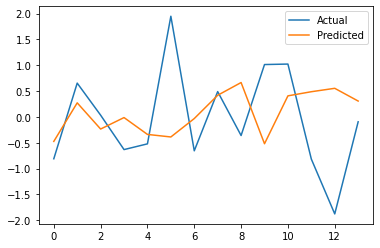

In [84]:
xrange= range(len(X_test))

plt.plot(xrange,y_test, label='Actual')
plt.plot(xrange,predicted_model, label='Predicted') 
plt.legend()


From sklearn using the function to calculate mean squared error

In [168]:
from sklearn.metrics import mean_squared_error

In [173]:
mse= mean_squared_error(y_test, predicted_model)

In [174]:
mse

1.294722226106254